Ceren Yılmaz Gülten 
Exercise 8 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Eigenvalue:  [ 2.78709212e+01 -1.90569772e-16  2.01185759e+00]
Eigenvectors: [[-0.11778963 -0.81649658  0.56520699]
 [-0.57444472 -0.40824829 -0.70946923]
 [-0.81002399  0.40824829  0.42094474]]
SVD Method
Eigenvalue [2.78730831e+04 2.01217528e+03 2.32811646e-28]
Eigenvector [[-5.19146589e-02 -5.14018795e-02  4.11142643e-01 ... -1.04214773e-03
  -3.23994927e-02  5.50088305e-02]
 [-2.18877624e-02  8.36383642e-03 -8.57621960e-01 ... -7.89148318e-04
  -1.05352707e-02  4.74743787e-03]
 [ 5.07902394e-03 -7.34130686e-03  4.13629547e-03 ...  1.79652517e-02
  -1.20676990e-02 -4.68768619e-02]
 ...
 [-8.91813034e-03  1.50357139e-02  1.77182423e-03 ...  9.99672428e-01
   2.44462344e-04  5.82178018e-04]
 [-2.30979862e-02 -2.93844077e-02  2.35408729e-03 ...  1.79735979e-04
   9.98726873e-01  1.35173548e-03]
 [ 5.76181507e-02  2.31724165e-04 -2.26976677e-02 ...  9.09361654e-04
   9.63701267e-04  9.95785757e-01]]
Are the SVD and dataset matrices equal? True
Are the SVD_eig and dataset matrices equal?

Text(0.5, 0.98, 'The Original vs. The New Basis')

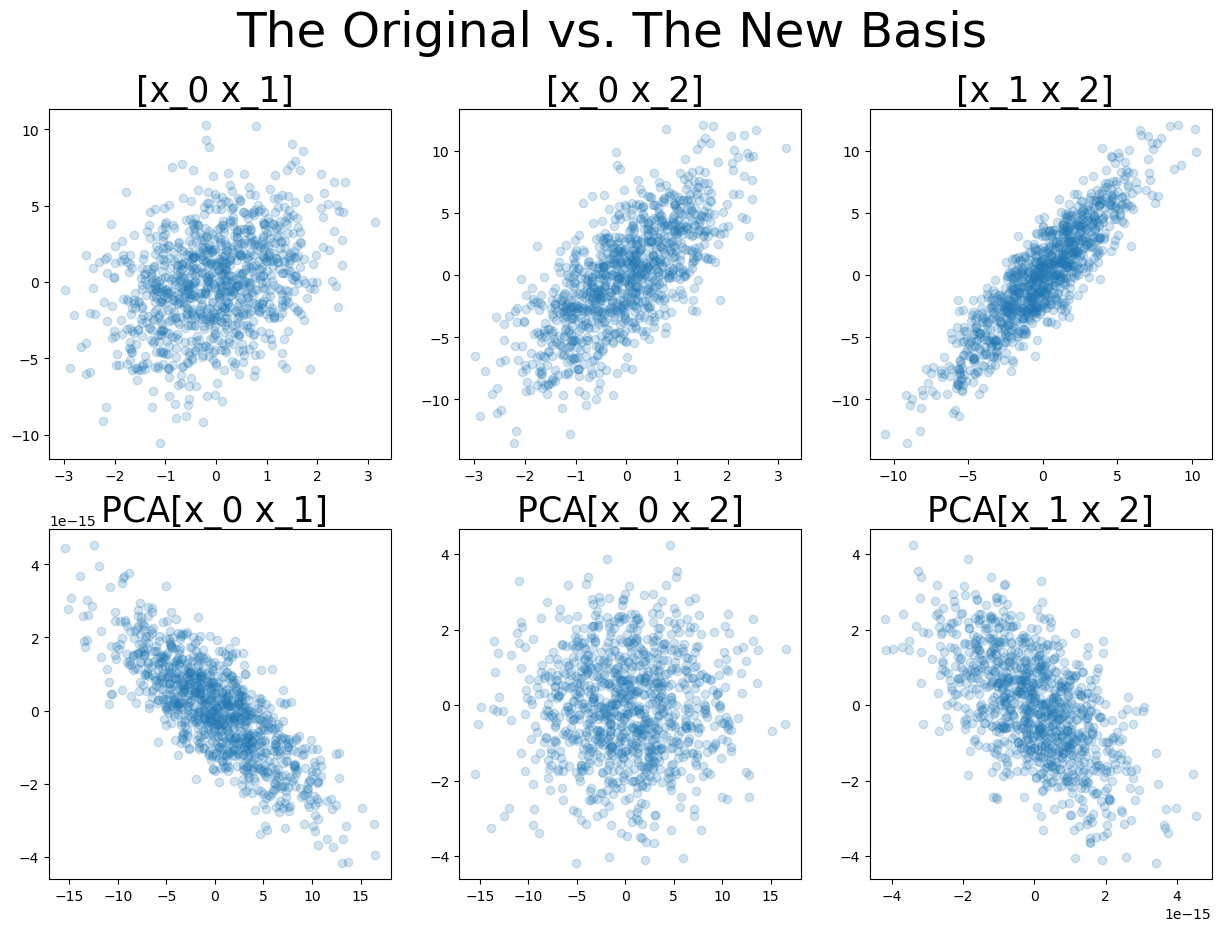

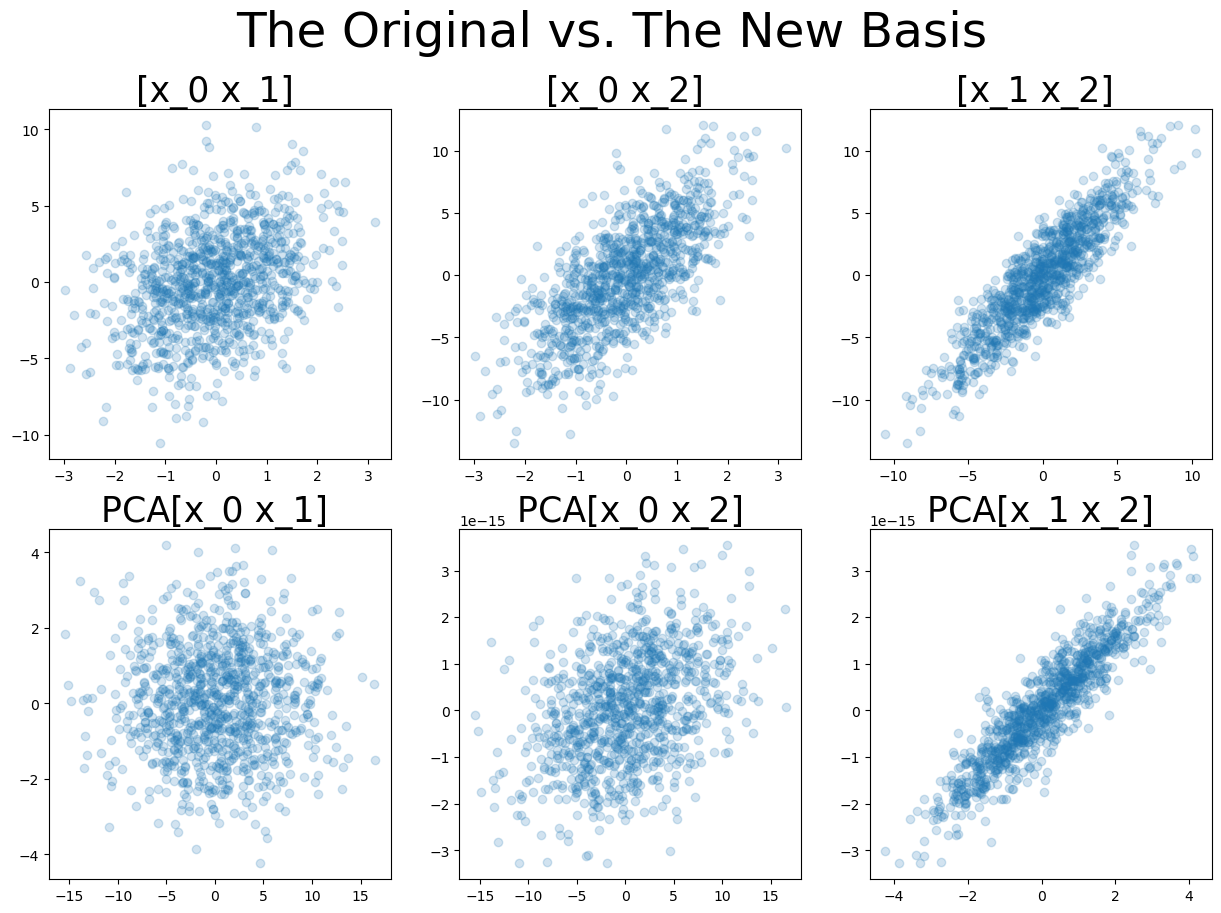

In [4]:
# 1. PCA on 3D dataset generation of dataset

x_1 = np.empty(1000)
x_2 = np.empty(1000)
x_3 = np.empty(1000)
for i in range(1000):
    x_1[i] = np.random.normal(0,1)
for i in range(1000):
    x_2[i] = x_1[i] + np.random.normal(0,3)
for i in range(1000):
    x_3[i] = 2*x_1[i] + x_2[i]
dataset = np.empty(shape=(1000,3))
dataset[:,0] = x_1
dataset[:,1] = x_2
dataset[:,2] = x_3
#eigenvectors and eigenvalues with eigendecomposition of the covariance matrix
# get reverse of dataset to have 
cov_matrix = np.cov(dataset.T)
l, V = np.linalg.eig(cov_matrix)
print("Eigenvalue: ",l)
print("Eigenvectors:", V)
#eigenvectors and eigenvalues with SVD
U, s, Vt = np.linalg.svd(dataset)
print("SVD Method")
print('Eigenvalue', s**2) #since spectrum is squareroot of the eigenvalues 
print('Eigenvector', U)
#checking two procedure 
S = np.zeros((1000, 3))
for i in range(min(1000,3)):
    S[i, i] = s[i]
SVD = np.dot(U, np.dot(S, Vt)) #for svd method 
SVD_eig = np.dot(S,V) #for eig method 
print("Are the SVD and dataset matrices equal?", np.allclose(SVD, dataset))
print("Are the SVD_eig and dataset matrices equal?",np.allclose(SVD_eig, dataset))
#PCA
Lambda = np.diag(l)
print("By selecting the component 0, we retain %s%% of the total variability" % ((l[0] + l[2])/Lambda.trace()))
#Redefine
dataset_new = np.dot(V.T,dataset.T)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
#scatter for each column of dataset 
axs[0,0].scatter(dataset[:,0], dataset[:,1], alpha=0.2)
axs[0,0].set_title("[x_0 x_1] ",fontsize=25)
axs[0,1].scatter(dataset[:,0], dataset[:,2], alpha=0.2)
axs[0,1].set_title("[x_0 x_2] ",fontsize=25)
axs[0,2].scatter(dataset[:,1], dataset[:,2], alpha=0.2)
axs[0,2].set_title("[x_1 x_2] ",fontsize=25)
#scatter of new basis data 
axs[1,0].scatter(dataset_new[0,:], dataset_new[1,:], alpha=0.2)
axs[1,0].set_title("PCA[x_0 x_1] ",fontsize=25)
axs[1,1].scatter(dataset_new[0,:], dataset_new[2,:], alpha=0.2)
axs[1,1].set_title("PCA[x_0 x_2]",fontsize=25)
axs[1,2].scatter(dataset_new[1,:], dataset_new[2,:], alpha=0.2)
axs[1,2].set_title("PCA[x_1 x_2]",fontsize=25)
fig.suptitle("The Original vs. The New Basis", fontsize=35)

# 2. PCA on a nD dataset
uncorr_noise = np.empty((1000,10))
for i in range(1000):
    for j in range(10):
        uncorr_noise[i][j] = np.random.normal(0,1/20) #standart derivation is smaller than x1 and x2
dataset_noise = np.append(dataset, uncorr_noise, axis=1)

#eigenvectors and eigenvalues with eigendecomposition of the covariance matrix get reverse of dataset to have
noise_cov = np.cov(dataset_noise.T)
l_noise, V_noise = np.linalg.eig(noise_cov)
print("Eigenvalue of noise data: ",l_noise)
print("Eigenvectors of noise data:", V_noise)

#eigenvectors and eigenvalues with SVD
U_noise, s_noise, Vt_noise = np.linalg.svd(dataset_noise)
print("SVD Method")
print('Eigenvalue', s_noise**2) #since spectrum is squareroot of the eigenvalues 
print('Eigenvector', U_noise)
#PCA
Lambda_noise = np.diag(l_noise)
print("By selecting the component 0, we retain %s%% of the total variability" % ((l_noise[0] + l[2])/Lambda_noise.trace()))
#Redefine
datasetnoise_new = np.dot(V_noise.T,dataset_noise.T)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
#scatter for each column of dataset 
axs[0,0].scatter(dataset_noise[:,0], dataset_noise[:,1], alpha=0.2)
axs[0,0].set_title("[x_0 x_1] ",fontsize=25)
axs[0,1].scatter(dataset_noise[:,0], dataset_noise[:,2], alpha=0.2)
axs[0,1].set_title("[x_0 x_2] ",fontsize=25)
axs[0,2].scatter(dataset_noise[:,1], dataset_noise[:,2], alpha=0.2)
axs[0,2].set_title("[x_1 x_2] ",fontsize=25)
#scatter of new basis data 
axs[1,0].scatter(datasetnoise_new[0,:], datasetnoise_new[1,:], alpha=0.2)
axs[1,0].set_title("PCA[x_0 x_1] ",fontsize=25)
axs[1,1].scatter(datasetnoise_new[0,:], datasetnoise_new[2,:], alpha=0.2)
axs[1,1].set_title("PCA[x_0 x_2]",fontsize=25)
axs[1,2].scatter(datasetnoise_new[1,:], datasetnoise_new[2,:], alpha=0.2)
axs[1,2].set_title("PCA[x_1 x_2]",fontsize=25)
fig.suptitle("The Original vs. The New Basis", fontsize=35)